# Possible Data Preparation / Preprocessing Steps

### missing values
### handle incorrect errors, display, token
### handle timezone/ datetime
### handle outliers
### Transformation: categorical to numericals
### Transformation: numericals to categorical 
### handle skewness (not normal distributed)
### handle scaling/normalization
### handle normalization using L1/L2
### dimension reduction

### Text data processing
### Time-Series data processing
### Handle Imbalanced Data

### Handle Multicollinearity
### Partition Data (Train & dev & test)

In [910]:
import os
import sys
import pandas as pd
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Import required for IterativeImputer
from sklearn.impute import IterativeImputer

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA


pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows


In [983]:
os.chdir('/Users/emilyli/workspace/datasets/')
# df = pd.read_csv('customer_segmentation.csv')
# df = pd.read_csv('Financials.csv')

# df = pd.read_csv('Instagram_Data.csv')
df = pd.read_csv('COVID-19 Coronavirus.csv')



In [960]:
df.shape

(225, 10)

In [961]:
df.dtypes

Country                     object
Other names                 object
ISO 3166-1 alpha-3 CODE     object
Population                   int64
Continent                   object
Total Cases                  int64
Total Deaths                 int64
Tot Cases//1M pop            int64
Tot Deaths/1M pop            int64
Death percentage           float64
dtype: object

# Clean df Column Names

In [1001]:
def clean_column_names(df):
    # Clean column names
    cleaned_columns = ['_'.join(col.strip().split()).lower() for col in df.columns]
    cleaned_columns = [ i.replace('//','/') for i in cleaned_columns]
    df.columns = cleaned_columns
    return df

df = clean_column_names(df)

In [977]:
df = clean_column_names(df)

In [1002]:
df.dtypes

country                     object
other_names                 object
iso_3166-1_alpha-3_code     object
population                   int64
continent                   object
total_cases                  int64
total_deaths                 int64
tot_cases/1m_pop             int64
tot_deaths/1m_pop            int64
death_percentage           float64
dtype: object

# Rename by Add Substring to df Columns Names

In [538]:
def rename_colnames(df, substring):
    
    df_copy = df.copy()
    for col in df.columns:
        new_col_name = col + substring
        df_copy.rename(columns={col: new_col_name}, inplace=True)

    return(df_copy)


# df1 = rename_colnames(df, '_rm_by_iqr')

# Rename by Remove Substring from df Columns Names

In [636]:
def rename_colnames_rm(df, substring_to_rm):
    
    df_copy = df.copy()
    for col in df.columns:
        new_col_name = col.replace(substring_to_rm, '')
        df_copy.rename(columns={col: new_col_name}, inplace=True)

    return(df_copy)


# df41 = rename_colnames_rm(df41, '_iqr')


# Clean Dollar Amount (Remove $,-)

In [757]:
# function to clean dirty amount columns
def clean_amount(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
        # Remove dollar signs and commas and convert to numeric
            # df[col] = [i.strip().replace('-', '').replace('$', '').replace(',', '') for i in df[col]]
            df[col] = df[col].str.replace(r'[$,-]', '', regex=True)
            df[col] = df[col].replace('', np.nan)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            # print(rel)
        else:
            next
    return df

##############################################################################

amt_col = ['units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit']

df = clean_amount(df, amt_col)


# Filter Out Rows Which All Columns Are NaN

In [684]:
def remove_rows_all_nan(df):
    # Remove rows where all columns are NaN
    cleaned_df = df.dropna(how='all')
    return cleaned_df

# df = remove_rows_all_nan(df)


def remove_rows_any_nan(df):
    # Remove rows where all columns are NaN
    cleaned_df = df.dropna(how='any')
    return cleaned_df

# df = remove_rows_any_nan(df)


In [921]:
df.dtypes

user_uuid                         int64
likes                             int64
days_passed_from_post             int64
likes_score                     float64
type                             object
numer_of_tags                     int64
numer_of_comments                 int64
date_posted              datetime64[ns]
year                              int64
month                             int64
day                               int64
hour                              int64
minute                            int64
dtype: object

In [918]:
df = clean_column_names(df)

In [920]:
# object to datetime:
col = 'date_posted'

df[col] =  pd.to_datetime(df[col])

year = df[col].dt.year
month = df[col].dt.month
day = df[col].dt.day
hour = df[col].dt.hour
minute = df[col].dt.minute
second = df[col].dt.second

In [937]:
ym = df[col].dt.strftime('%Y-%m')
ymd = df[col].dt.strftime('%Y-%m-%d')


In [941]:

def get_datetime_info(df):
    
    if isinstance(df, pd.DataFrame):
        for col in df.columns:
            df[col] =  pd.to_datetime(df[col])
            yr = df[col].dt.year
            mo = df[col].dt.month
            day = df[col].dt.day
            # hr = df[col].dt.hour
            # minute = df[col].dt.minute
            # sec = df[col].dt.second
            ym = df[col].dt.strftime('%Y-%m')
            ymd = df[col].dt.strftime('%Y-%m-%d')
            
    elif isinstance(df, pd.Series):
        df =  pd.to_datetime(df)
        yr = df.dt.year
        mo = df.dt.month
        day = df.dt.day
        # hr = df[col].dt.hour
        # minute = df[col].dt.minute
        # sec = df[col].dt.second
        ym = df.dt.strftime('%Y-%m')
        ymd = df.dt.strftime('%Y-%m-%d')
        # return(yr, mo, day, hr,minute, sec, ym, ymd)
        
    return(yr, mo, day, ym, ymd)



In [942]:
df['yr'], df['mo'],df['day'], df['ym'], df['ymd'] = get_datetime_info(df['date_posted'])

In [943]:
df.head()

,user_uuid,likes,days_passed_from_post,likes_score,type,numer_of_tags,numer_of_comments,date_posted,year,month,day,hour,minute,yr,mo,ym,ymd
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,2019,5,2019-05,2019-05-12
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,2019,5,2019-05,2019-05-12
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18,2019,5,2019-05,2019-05-03
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40,2019,5,2019-05,2019-05-02
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51,2019,4,2019-04,2019-04-25


# Outlier Detection & Removal

In [ ]:
# remove outliers per each numerical col using either IQR, std or zcore
def remove_outliers(df, method):
    
    df = df.select_dtypes(include=['int', 'float'])    
    
    outliers_removed = pd.DataFrame()

    for col in df.columns:
        stats = df[col].describe()
        mean = stats.loc['mean']
#         min_val = stats.loc['min']
#         max_val = stats.loc['max']
        
        if method == 'IQR':
            Q1 = stats.loc['25%']
            Q3 = stats.loc['75%']
            IQR = Q3 - Q1
            lower_threshold = Q1 - 1.5 * IQR
            upper_threshold = Q3 + 1.5 * IQR

            # Remove outliers by std method:
            outliers_removed[col] = df[col][(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]

        elif method == 'std':
            std = stats.loc['std']
            threshold = 3 * std
            outliers_removed[col] = df[col][abs(df[col] - mean) <= threshold]

        elif method == 'zscore':
            z_scores = zscore(df[col])
            threshold = 3
            outliers_removed[col] = df[col][abs(z_scores) <= threshold]
            
        else:
            next

    return outliers_removed


# df4 = remove_outliers(df4, method = 'IQR')
# df5 = remove_outliers(df5, method = 'std')
# df6 = remove_outliers(df6, method = 'zscore')


## Remove Outliers Comparison:
### by std and zscore methods very similar to removee the extreme, but keep most of them; while IQR almost remove everythinng beyond max/min of IQR

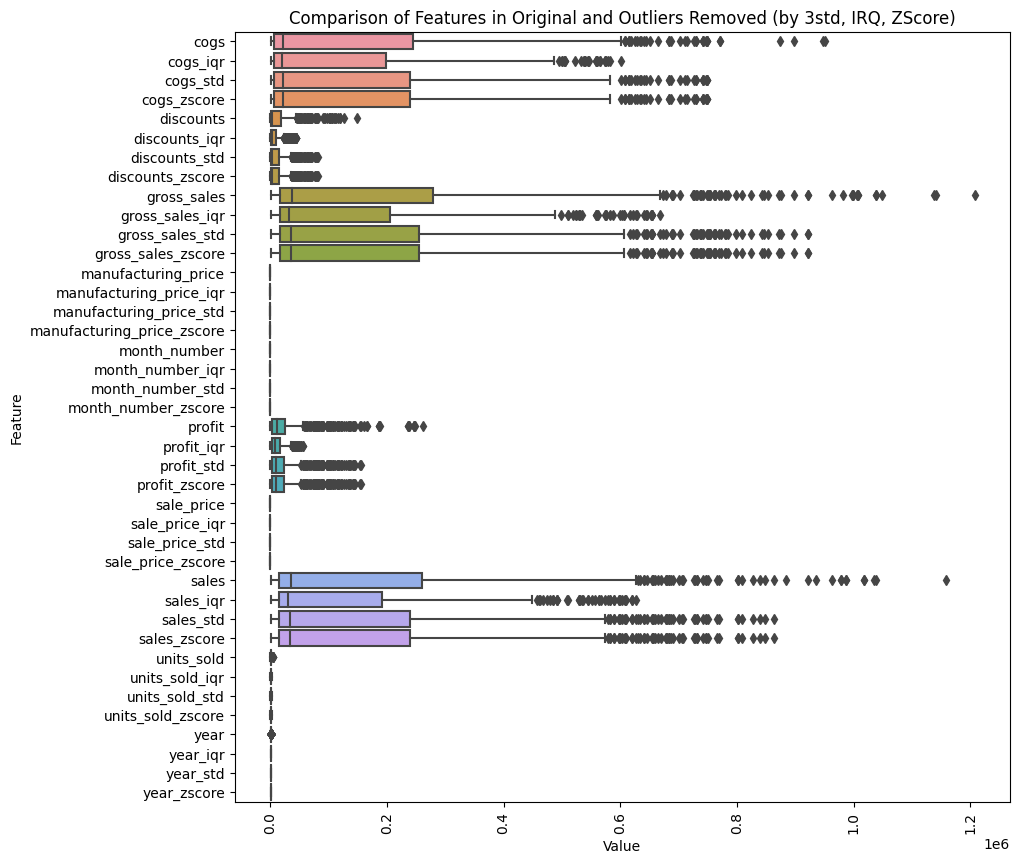

In [578]:

# Melt the DataFrames to convert them to long format
df_melted = df.melt(var_name='Feature', value_name='Value')
df4_melted = df4.melt(var_name='Feature', value_name='Value')
df5_melted = df5.melt(var_name='Feature', value_name='Value')
df6_melted = df6.melt(var_name='Feature', value_name='Value')

# Combine the melted DataFrames
combined_df = pd.concat([df_melted, df4_melted, df5_melted, df6_melted], ignore_index=True)

combined_df = combined_df.sort_values(by = 'Feature')

# Plot the combined DataFrame as boxplots
plt.figure(figsize=(10, 10))
plt.title('Comparison of Features in Original and Outliers Removed (by 3std, IRQ, ZScore)')

# Use seaborn for boxplot
# import seaborn as sns
sns.boxplot(x='Value', y='Feature', data=combined_df, orient='h'
            # hue='variable'
           )
plt.xticks(rotation=90)
plt.show()

# Handling Missing Values - Imputation
### Inputation of randomsampling, mean, median, mode (most-freq), knn, regression

In [484]:
#imputation
# to replace nan in num by random sampling of its own column
# Define a function for random sampling imputation

np.random.seed(123)
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.chained_assignment = 'warn'


def random_sampling_imputation(df, columns):
    # Get non-missing values per col
    for col in columns:
        non_missing = df[col].dropna()
        # Generate random indices
        rand_index = np.random.choice(non_missing.index, size=df[col].isnull().sum(), replace=True)
         # Replace missing values with randomly sampled index's values of same col
        df[col].iloc[df[col].isnull()] = non_missing[rand_index].values
        # this part help to quickly get the random sample index used for imputation, validation
        # col1 = [int(str(x).replace(' ',',')) for x in rand_index]
        # # col = [int(x) for x in col]
        # print(col1)        
    return df


# impute_col = ['discounts','profit']
# df = random_sampling_imputation(df, impute_col)

In [787]:
# Instantiate SimpleImputer with desired strategy (mean, median, mode, constant)
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on the DataFrame
imputed_df42 = pd.DataFrame(imputer.fit_transform(df42), columns=df42.columns)

imputer = SimpleImputer(strategy='median')
# Fit and transform the imputer on the DataFrame
imputed_df43 = pd.DataFrame(imputer.fit_transform(df43), columns=df43.columns)


imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform the imputer on the DataFrame
imputed_df44 = pd.DataFrame(imputer.fit_transform(df44), columns=df44.columns)


# Instantiate KNNImputer with desired number of neighbors (n_neighbors)
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the imputer on the DataFrame
imputed_df45 = pd.DataFrame(imputer.fit_transform(df45), columns=df45.columns)


# Instantiate IterativeImputer with desired estimator (regressor)
imputer = IterativeImputer()
# Fit and transform the imputer on the DataFrame
imputed_df46 = pd.DataFrame(imputer.fit_transform(df46), columns=df46.columns)


/Users/emilyli/eli_py39/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Combine Multiple df and Sort by Similar df Colnames

In [804]:
# Join multiple DataFrames into one, axis = 1 cause df lost all colnames
combined_df = pd.concat([df4, imputed_df41, imputed_df42, imputed_df43, imputed_df44, imputed_df45, imputed_df46], ignore_index=True, axis = 1)

# put all df colnames tgt
combined_df_colnames = list(df4.columns) + list(imputed_df41.columns) + list(imputed_df42.columns) + list(imputed_df43.columns) + list(imputed_df44.columns) + list(imputed_df45.columns) + list(imputed_df46.columns)

# crate key:value pair for numeric colname to actual colnames
rename_dict = dict(zip(combined_df.columns, combined_df_colnames))
combined_df.rename(columns=rename_dict, inplace=True)

# Custom sorting function to sort columns by prefix (e.g., 'A_', 'B_', 'C_', etc.)
sorted_columns = sorted(combined_df.columns, key=lambda x: x.split('_')[0])

# Reindex the DataFrame with the sorted columns
combined_df = combined_df.reindex(columns=sorted_columns)


In [805]:
combined_df.columns


Index(['cogs', 'cogs_randsamp', 'cogs_mean', 'cogs_median', 'cogs_mode',
       'cogs_knn', 'cogs_regression', 'discounts', 'discounts_randsamp',
       'discounts_mean', 'discounts_median', 'discounts_mode', 'discounts_knn',
       'discounts_regression', 'gross_sales', 'gross_sales_randsamp',
       'gross_sales_mean', 'gross_sales_median', 'gross_sales_mode',
       'gross_sales_knn', 'gross_sales_regression', 'manufacturing_price',
       'manufacturing_price_randsamp', 'manufacturing_price_mean',
       'manufacturing_price_median', 'manufacturing_price_mode',
       'manufacturing_price_knn', 'manufacturing_price_regression',
       'month_number', 'month_number_randsamp', 'month_number_mean',
       'month_number_median', 'month_number_mode', 'month_number_knn',
       'month_number_regression', 'profit', 'profit_randsamp', 'profit_mean',
       'profit_median', 'profit_mode', 'profit_knn', 'profit_regression',
       'sale_price', 'sale_price_randsamp', 'sale_price_mean',
     

# Handle Missing: Comparison of Different Imputation Results (Statistics & Histograms)
### Imputation include using randsampling, mean, median, mode, knn and regression

,cogs,cogs_randsamp,cogs_mean,cogs_median,cogs_mode,cogs_knn,cogs_regression
count,700.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,145475.211429,113287.809626,113895.371970,109042.335489,108905.783764,125614.894828,114270.235212
std,203865.506118,156723.539852,153086.683549,154492.523912,154572.364608,162287.103080,153149.663445
min,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
25%,7490.000000,7102.500000,7485.000000,7485.000000,7485.000000,7485.000000,7485.000000
50%,22506.250000,19742.500000,22345.000000,20070.000000,17620.000000,22345.000000,22345.000000
75%,245607.500000,199170.000000,189005.000000,189005.000000,189005.000000,240255.000000,189005.000000
max,950625.000000,601380.000000,601380.000000,601380.000000,601380.000000,601380.000000,601380.000000


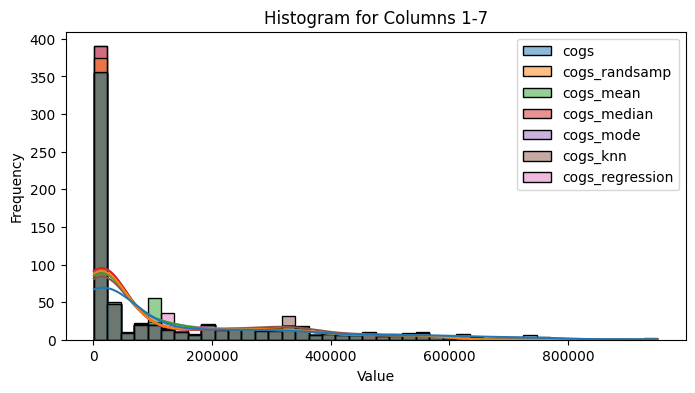

,discounts,discounts_randsamp,discounts_mean,discounts_median,discounts_mode,discounts_knn,discounts_regression
count,647.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,14227.586198,8235.906710,8159.046644,7283.374684,7072.108879,9906.797667,9773.120633
std,23562.833079,11298.623778,10359.554063,10557.261658,10662.641078,11515.940133,13864.804050
min,18.410000,18.410000,18.410000,18.410000,18.410000,18.410000,18.410000
25%,1061.000000,941.967500,1191.300000,1191.300000,1191.300000,1088.045000,879.000000
50%,3108.000000,2563.600000,3872.000000,2567.600000,1776.700000,3595.275000,2662.375000
75%,18809.250000,10786.000000,8159.046644,6804.425000,6804.425000,20343.750000,13059.086032
max,149677.500000,45078.000000,45078.000000,45078.000000,45078.000000,45078.000000,72874.631388


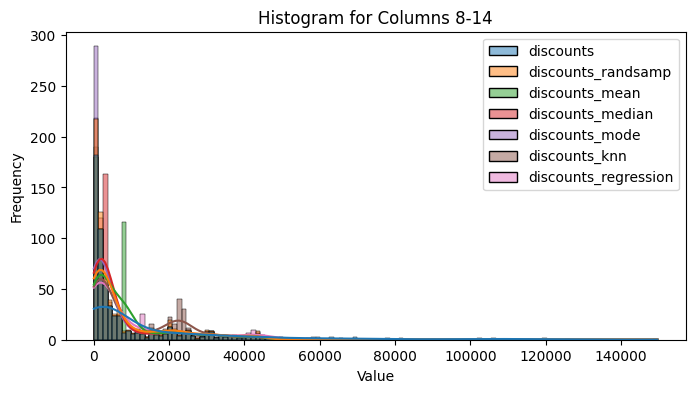

,gross_sales,gross_sales_randsamp,gross_sales_mean,gross_sales_median,gross_sales_mode,gross_sales_knn,gross_sales_regression
count,7.000000e+02,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.827594e+05,126083.393678,125790.981279,118455.989943,116198.619253,150374.652011,139026.759380
std,2.542623e+05,167474.216233,161382.222189,163316.143870,164675.860660,187725.703881,176773.990599
min,1.799000e+03,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
25%,1.739175e+04,16101.750000,17332.500000,17332.500000,12089.000000,17332.500000,17332.500000
50%,3.798000e+04,33897.500000,37980.000000,32970.000000,30308.000000,37980.000000,37980.000000
75%,2.790250e+05,206700.000000,177756.250000,177756.250000,177756.250000,268125.000000,210700.000000
max,1.207500e+06,667450.000000,667450.000000,667450.000000,667450.000000,667450.000000,667450.000000


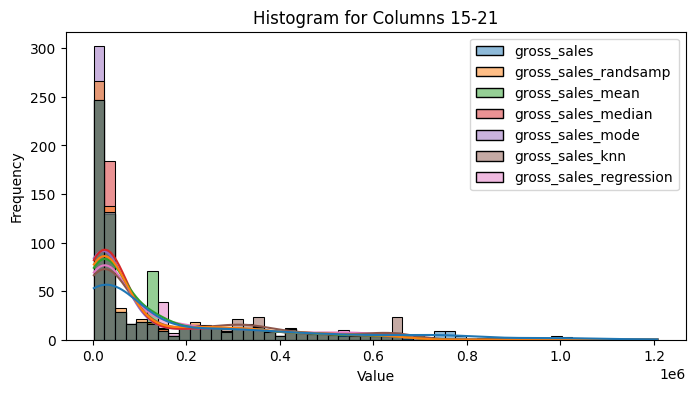

,manufacturing_price,manufacturing_price_randsamp,manufacturing_price_mean,manufacturing_price_median,manufacturing_price_mode,manufacturing_price_knn,manufacturing_price_regression
count,700.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,96.477143,96.625000,96.625000,96.625000,96.625000,96.625000,96.625000
std,108.602612,108.580939,108.580939,108.580939,108.580939,108.580939,108.580939
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
max,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000


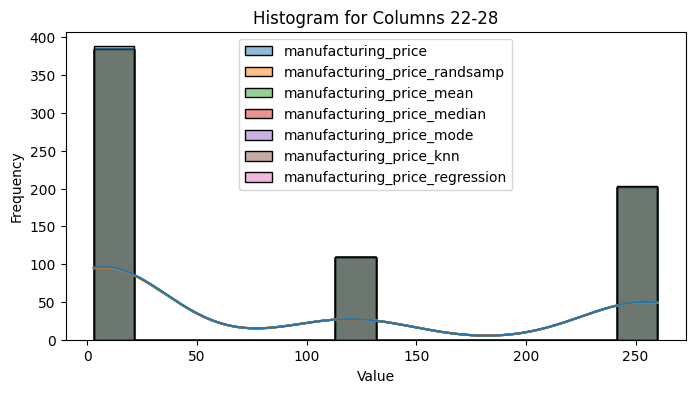

,month_number,month_number_randsamp,month_number_mean,month_number_median,month_number_mode,month_number_knn,month_number_regression
count,700.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,7.900000,7.926724,7.926724,7.926724,7.926724,7.926724,7.926724
std,3.377321,3.367056,3.367056,3.367056,3.367056,3.367056,3.367056
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.750000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,10.250000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


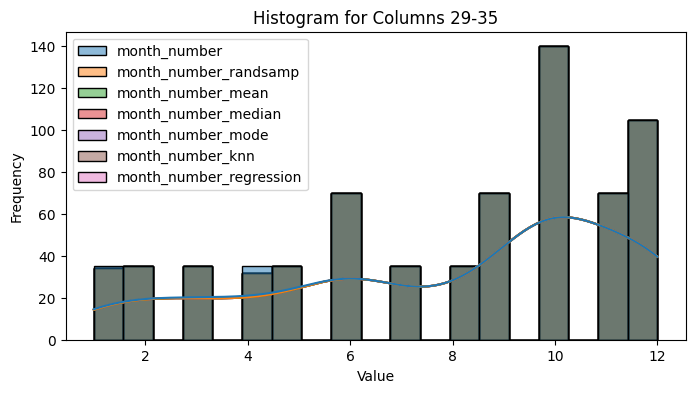

,profit,profit_randsamp,profit_mean,profit_median,profit_mode,profit_knn,profit_regression
count,637.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,27741.010267,12239.243362,12491.036870,11670.297141,9755.335503,14039.701560,14712.225852
std,43059.332905,11891.432755,10791.329894,10898.985992,11932.998139,11345.463406,28147.626322
min,285.600000,285.600000,285.600000,285.600000,285.600000,285.600000,-68050.411528
25%,3875.850000,3141.390000,4438.087500,4438.087500,928.937500,4438.087500,2297.340000
50%,11106.100000,8829.275000,12491.036870,8829.275000,4944.310000,12531.600000,8204.000000
75%,25162.000000,16993.600000,13894.350000,13894.350000,13894.350000,17670.060000,18130.250000
max,262200.000000,56245.000000,56245.000000,56245.000000,56245.000000,56245.000000,155250.000000


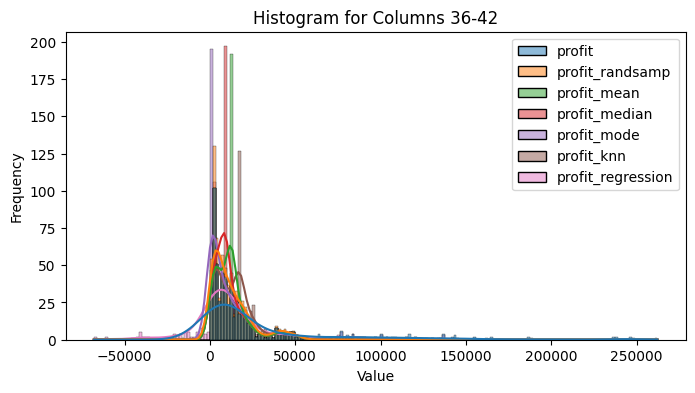

,sale_price,sale_price_randsamp,sale_price_mean,sale_price_median,sale_price_mode,sale_price_knn,sale_price_regression
count,700.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,118.428571,118.729885,118.729885,118.729885,118.729885,118.729885,118.729885
std,136.775515,137.037459,137.037459,137.037459,137.037459,137.037459,137.037459
min,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
25%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
50%,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
75%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
max,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000


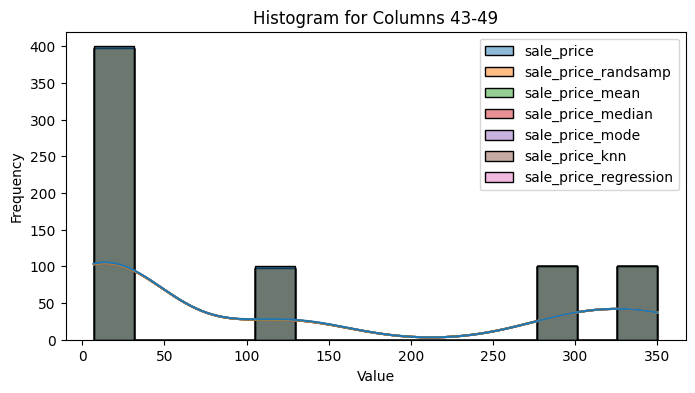

,sales,sales_randsamp,sales_mean,sales_median,sales_mode,sales_knn,sales_regression
count,7.000000e+02,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.696091e+05,118390.017026,118356.852115,111681.345848,109472.403319,139946.049101,128982.461064
std,2.367263e+05,159227.934695,152950.009441,154709.784707,156053.547229,175340.608391,165213.430475
min,1.655080e+03,1655.080000,1655.080000,1655.080000,1655.080000,1655.080000,1655.080000
25%,1.592800e+04,14714.400000,15889.590000,15889.590000,10942.200000,15889.590000,15889.590000
50%,3.554020e+04,30216.000000,35540.200000,30693.600000,28299.750000,35540.200000,35540.200000
75%,2.610775e+05,191394.437500,167371.875000,167371.875000,167371.875000,249317.750000,200499.000000
max,1.159200e+06,626640.000000,626640.000000,626640.000000,626640.000000,626640.000000,626640.000000


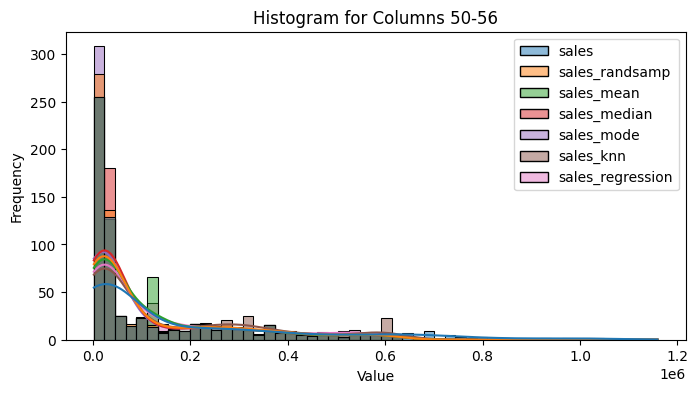

,units_sold,units_sold_randsamp,units_sold_mean,units_sold_median,units_sold_mode,units_sold_knn,units_sold_regression
count,700.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1608.294286,1592.815374,1592.815374,1592.815374,1592.815374,1592.815374,1592.815374
std,867.427859,845.400022,845.400022,845.400022,845.400022,845.400022,845.400022
min,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
25%,905.000000,900.750000,900.750000,900.750000,900.750000,900.750000,900.750000
50%,1542.500000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
75%,2229.125000,2214.250000,2214.250000,2214.250000,2214.250000,2214.250000,2214.250000
max,4492.500000,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000


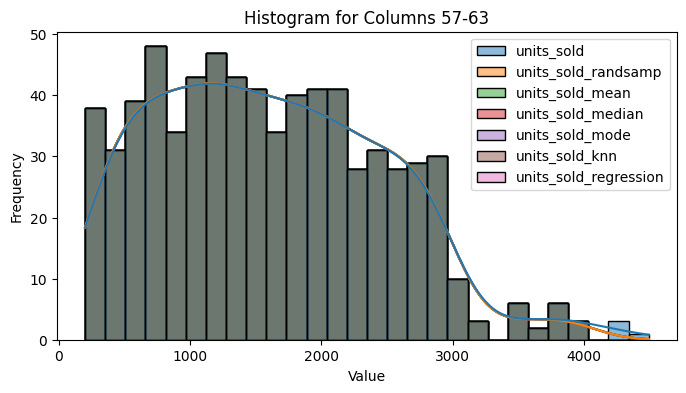

,year,year_randsamp,year_mean,year_median,year_mode,year_knn,year_regression
count,700.000000,696.0,696.0,696.0,696.0,696.0,696.0
mean,2013.750000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0
std,0.433322,0.0,0.0,0.0,0.0,0.0,0.0
min,2013.000000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0
25%,2013.750000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0
50%,2014.000000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0
75%,2014.000000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0
max,2014.000000,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0


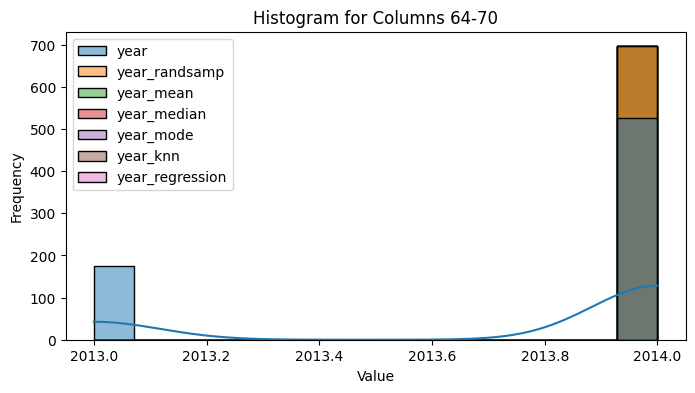

In [810]:
# eg: total 70 col, make one plot every 7 col, --> yield to 10 plots (70/7)
# Calculate the number of columns in your DataFrame
num_columns = len(combined_df.columns)

# Define the number of columns you want to plot together
num_columns_per_plot = 7

# Calculate the number of plots needed
num_plots = num_columns // num_columns_per_plot
if num_columns % num_columns_per_plot != 0:
    num_plots += 1

num_plots

# Iterate over each group of columns and plot histogram
for i in range(num_plots):
    start_idx = i * num_columns_per_plot
    end_idx = min((i + 1) * num_columns_per_plot, num_columns)
    subset = combined_df.iloc[:, start_idx:end_idx]
    display(subset.describe())

    # subset= subset of the original df which you want to cut into each section for hist display
    # Plot histogram using Seaborn
    plt.figure(figsize=(8, 4))  # Adjust figure size as needed
    sns.histplot(data=subset, kde=True,)  # Adjust other parameters as needed
    # sns.histplot(data=subset, kde=True, log_scale='y')  # Set log scale for y-axis
    plt.title(f'Histogram for Columns {start_idx+1}-{end_idx}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


# Convert Categoricals to Numericals

In [31]:
# convert using one-hot encoding/ dummy: result is each categorical level spread as individual col as boolean value, 
#result very wide df, could be highly colinear which info of multiple (new) col overlapped, unnecessary
convert_col = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns = convert_col)


# Convert categorical data to numerical using factorize: categorical to numerical level 1-to-1, mayybe beneficial for high categorical level to avoid colinearity
# factorized_idx: show the index of which coordinate w/ the numbers
df['Dt_Customer'], factorized_idx = pd.factorize(df['Dt_Customer'])



# Convert Numericals to Categoricals (TBD)
### Binning, thresholding, encode ordinal variables, clustering (eg.kmean), experts features engineering

# Handle Skeweness

In [ ]:
stats.shapiro(setosa['sepal_width'])


In [1003]:
df.dtypes

country                     object
other_names                 object
iso_3166-1_alpha-3_code     object
population                   int64
continent                   object
total_cases                  int64
total_deaths                 int64
tot_cases/1m_pop             int64
tot_deaths/1m_pop            int64
death_percentage           float64
dtype: object

In [1043]:
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import yeojohnson


In [1092]:
def handle_skewness(df):
    
    numerical_cols = df.select_dtypes(include=['number']).columns
    # print(numerical_cols)
    for col in numerical_cols:
        statistic, p_value = stats.shapiro(df[col])        
        if p_value >= 0.05:
            print(col, ' is normally distributed.')
            next
            
        else:
            print("statistic: ", statistic, "p_value: ", p_value)
            plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
            stats.probplot(df[col], dist="norm", plot=plt)
            plt.title("Q-Q Plot for col: " + col)
            plt.xlabel("Theoretical Quantiles")
            plt.ylabel("Sample Quantiles")
            plt.show()
            plt.figure(figsize=(4,2))
            sns.histplot(df[col], kde=True)
            plt.title("Histogram of col: " + col)
            plt.xlabel("Values")
            plt.ylabel("Frequency")
            plt.show()
            
            log_trans = boxcox_trans = yeojohn_trans = None
            # only log transform when no zero in array
            if (df[col] == 0).sum() ==0:  
                log_trans = np.log(df[col])
                print('log trans')
            else:
                # boxcox transform for all positive values
                if (np.all(df[col] >0)):
                    boxcox_trans, lambda_ = boxcox(df[col])
                    print('boxcox trans')

                # yeojohn transform can be general for everything else
                else:
                    yeojohn_trans, lambda_ = yeojohnson(df[col])
                    print('yeojohnson trans')

                    
            trans_obj = [log_trans,boxcox_trans, yeojohn_trans]

            # obj is one of the trans_obj depend on condition to do the trans
            for i, obj in enumerate(trans_obj, start=1):
                if obj is not None: 
                    statistic, p_value = stats.shapiro(obj)        
                    print("After transform for normality: statistic: ", statistic, "p_value: ", p_value)

                    plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
                    stats.probplot(obj, dist="norm", plot=plt)
                    plt.title("Q-Q Plot for trans col: " + col)
                    plt.xlabel("Theoretical Quantiles")
                    plt.ylabel("Sample Quantiles")
                    plt.show()
                    # print(i, obj)
                    plt.figure(figsize=(4,2))
                    sns.histplot(obj, kde=True,  label='{i}: {obj}', stat='density')
                    plt.title("Histogram of trans col: " + col)
                    plt.xlabel("Values")
                    plt.ylabel("Frequency")
                    plt.show()
    # # for col in df

In [1093]:
# Shapiro-Wilk test for normality

# Normality test:
# Null hypothesis (H0): The data follows a normal distribution.
# Alternative hypothesis (H1): The data does not follow a normal distribution.
# Box-Cox transformation is a more generalized approach that can handle both positive and negative skewness.It requires the data to be strictly positive.
# Yeo-Johnson transformation is an extension of the Box-Cox transformation that can handle both positive and negative skewness, including zero and negative values.


statistic:  0.2156541347503662 p_value:  1.0300275079532274e-29


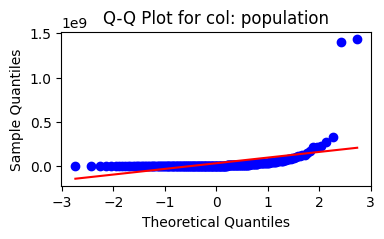

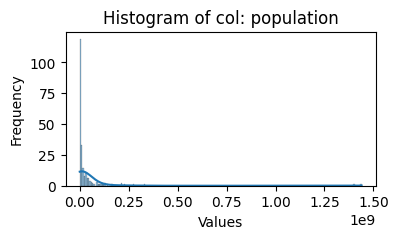

log trans
After transform for normality: statistic:  0.9628733396530151 p_value:  1.3351270354178268e-05


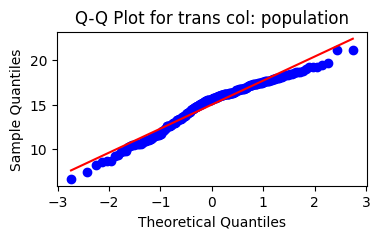

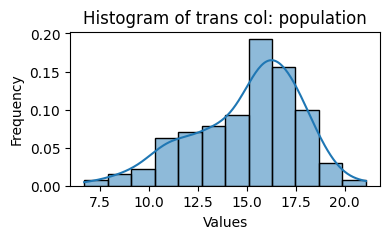

statistic:  0.3048919439315796 p_value:  2.364376322170497e-28


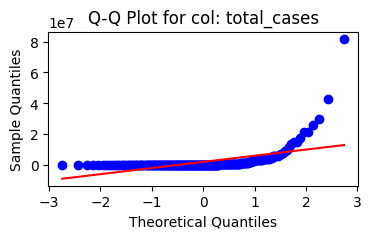

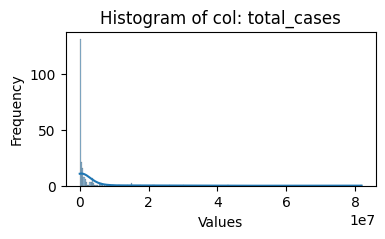

log trans
After transform for normality: statistic:  0.9463979601860046 p_value:  2.2100684304859897e-07


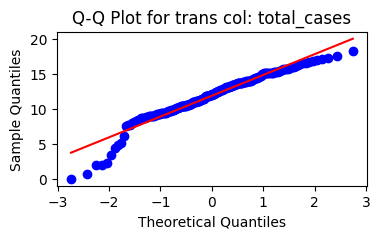

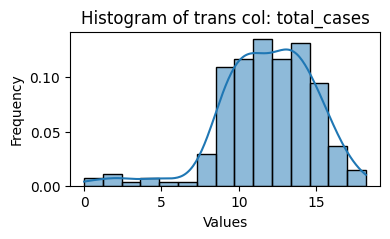

statistic:  0.2891409397125244 p_value:  1.3298429506490985e-28


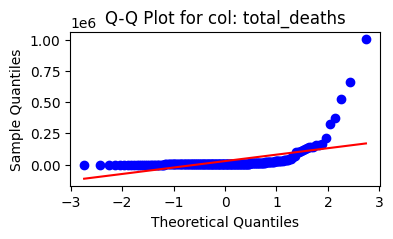

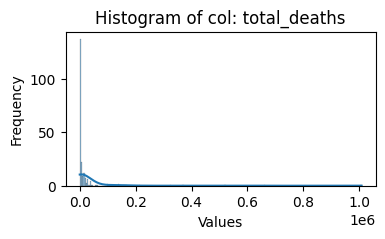

yeojohnson trans
After transform for normality: statistic:  0.9907915592193604 p_value:  0.16527768969535828


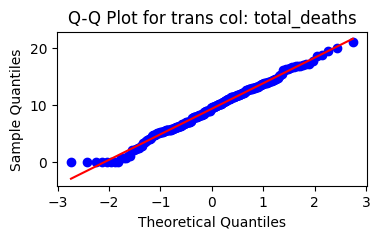

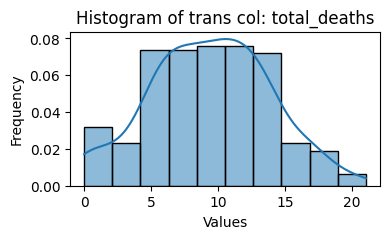

statistic:  0.8561736345291138 p_value:  1.1138491387910343e-13


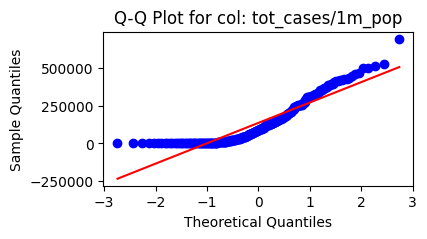

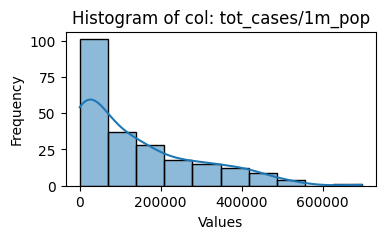

log trans
After transform for normality: statistic:  0.8887571692466736 p_value:  7.930579803971938e-12


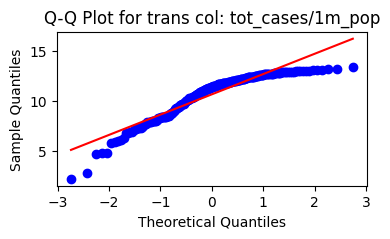

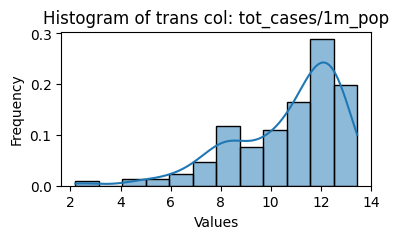

statistic:  0.8406120538711548 p_value:  1.8355232766120895e-14


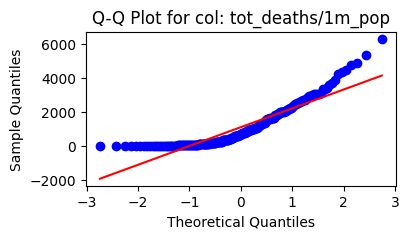

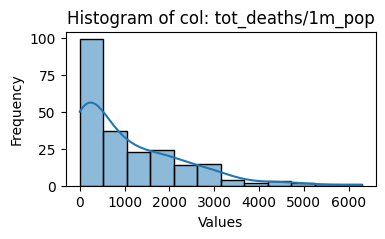

yeojohnson trans
After transform for normality: statistic:  0.9714333415031433 p_value:  0.00016326406330335885


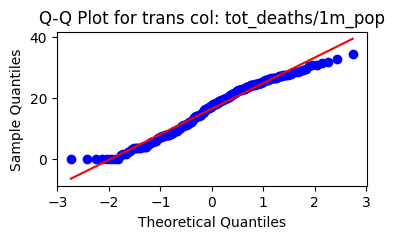

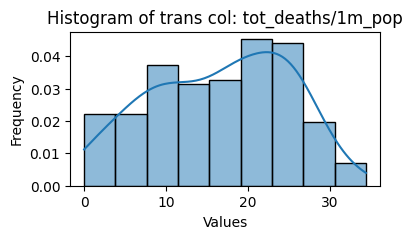

statistic:  0.6139950156211853 p_value:  3.312655142705691e-22


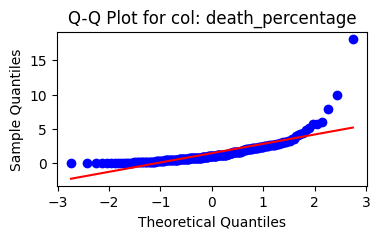

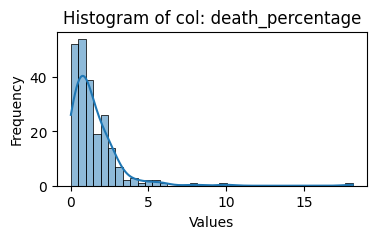

yeojohnson trans
After transform for normality: statistic:  0.9864857196807861 p_value:  0.03137899562716484


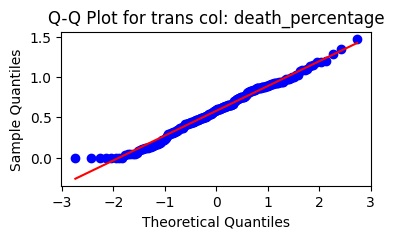

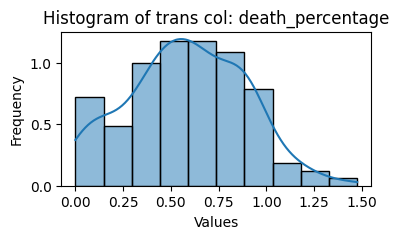

In [1094]:
handle_skewness(df)



In [1086]:
df.describe()

,population,total_cases,total_deaths,tot_cases/1m_pop,tot_deaths/1m_pop,death_percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [1087]:
(df==0).sum()

country                    0
other_names                0
iso_3166-1_alpha-3_code    0
population                 0
continent                  0
total_cases                0
total_deaths               8
tot_cases/1m_pop           0
tot_deaths/1m_pop          8
death_percentage           8
dtype: int64

# Scaling / Normalization

In [826]:
########################################################
# Z norm transform 
scaler = StandardScaler()
# z score normalization
znorm_array = scaler.fit_transform(df)

# this step use to visualize Z normed/scaled distribution
df_znorm = pd.DataFrame(znorm_array, columns=df.columns)
########################################################

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the data
mmnorm_array = scaler.fit_transform(df)
df_mmnorm = pd.DataFrame(mmnorm_array, columns=df.columns)


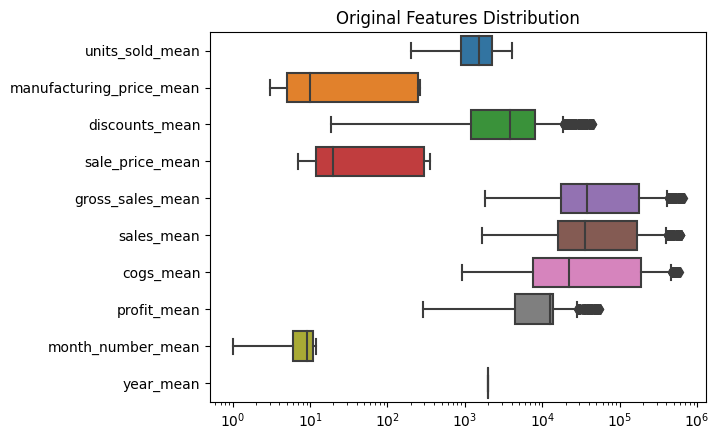

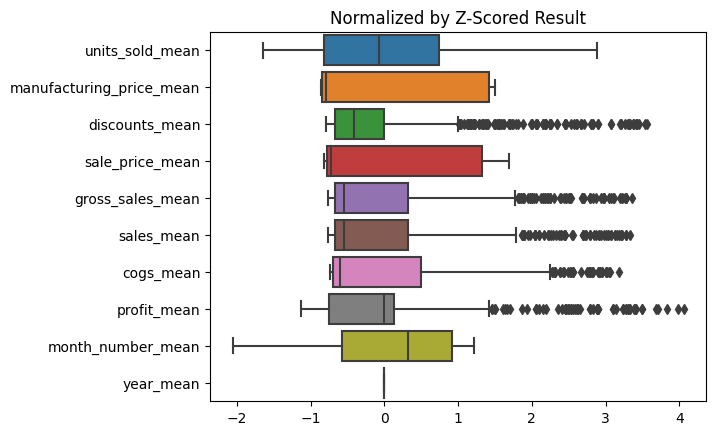

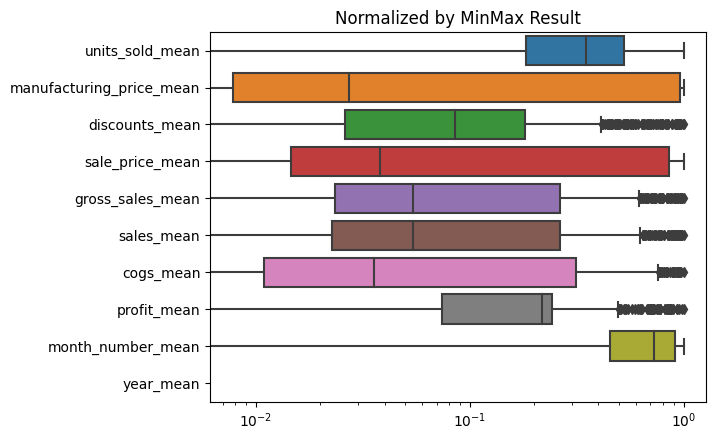

In [832]:
# show new distribution of each scaled col
# original distr
sns.boxplot(data=df, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Original Features Distribution')
plt.xscale('log')
plt.show()


# scaled by Z-scored
sns.boxplot(data=df_znorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by Z-Scored Result')
# plt.xscale('log')
plt.show()


# scaled by MinMax
sns.boxplot(data=df_mmnorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by MinMax Result')
plt.xscale('log')
plt.show()


# Feature Selection/ Dimension Reduction:
#### PCA: Principle Component Analysis
#### LDA: Linear Discriminant Analysis
#### t-SNE: t-Distributed Stochastic Neighbor Embedding 
#### ICA: Independent Component Analysis

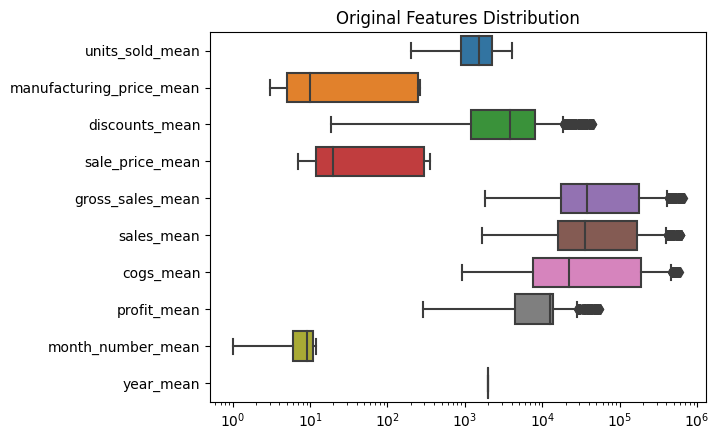

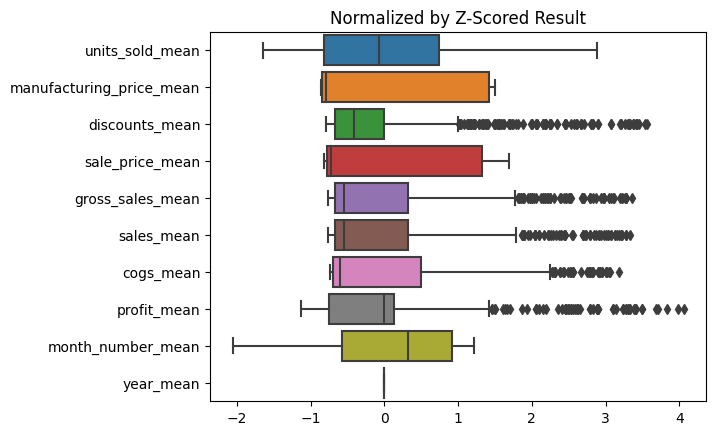

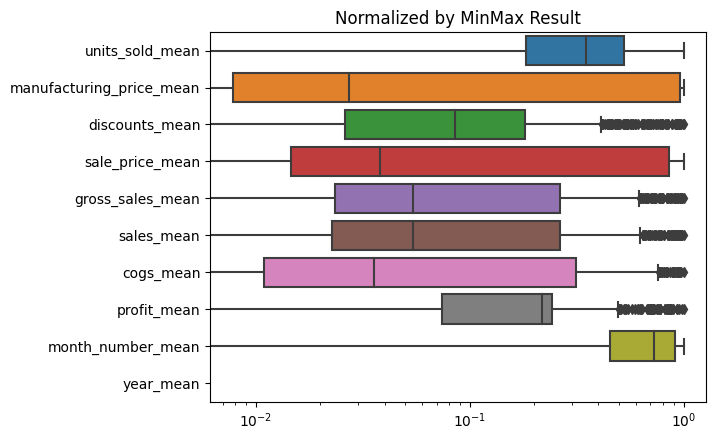

In [831]:
# show new distribution of each scaled col
# original distr
sns.boxplot(data=df, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Original Features Distribution')
plt.xscale('log')
plt.show()


# scaled by Z-scored
sns.boxplot(data=df_znorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by Z-Scored Result')
# plt.xscale('log')
plt.show()


# scaled by MinMax
sns.boxplot(data=df_mmnorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by MinMax Result')
plt.xscale('log')
plt.show()


## Dimension Reduction by PCA: 
### Linear unsupervised dimension reduction (not required y)

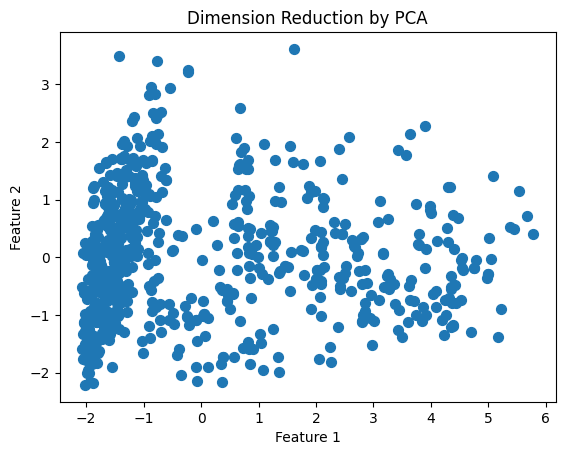

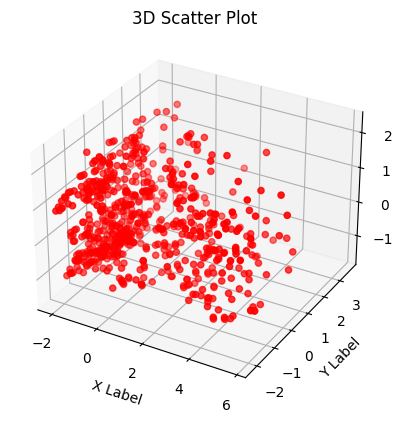

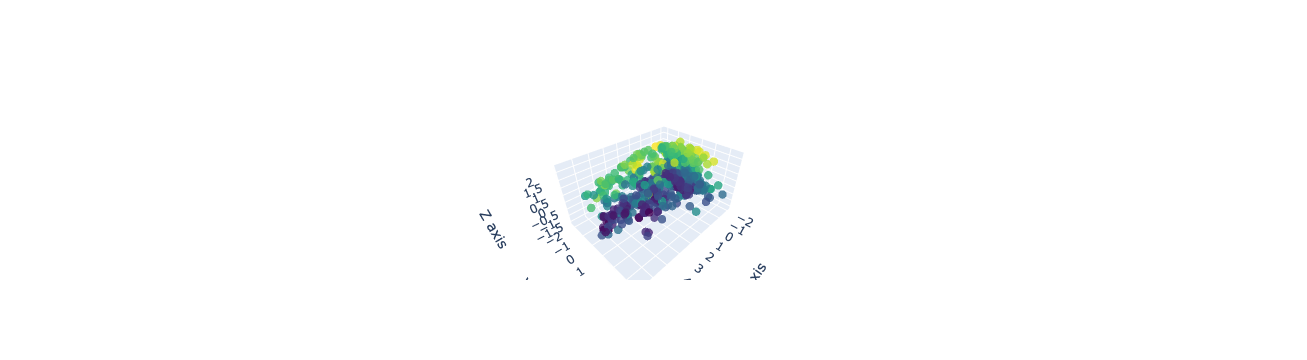

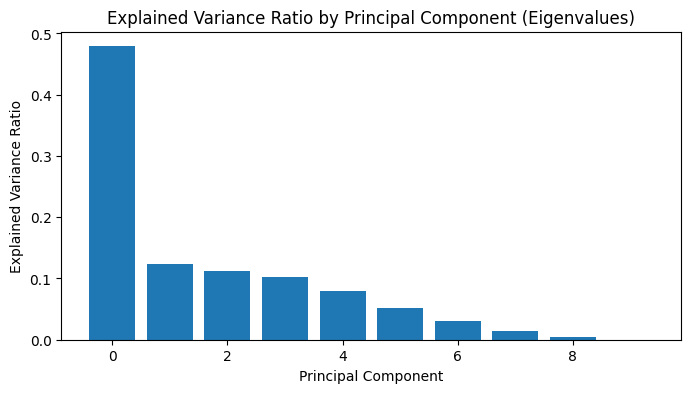

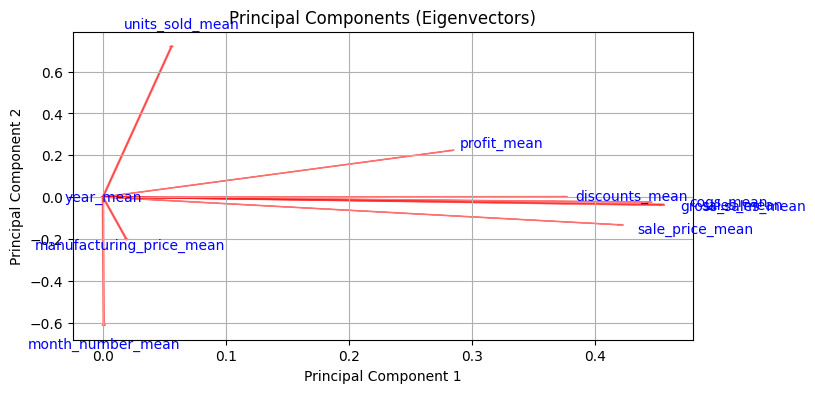

In [866]:
from sklearn.decomposition import PCA
import numpy as np
#good for modeling purposes: fit & transform
# Create PCA object
pca = PCA(n_components=2)
# df_pca is the pca reduced data down to n_components specified above
# df_pca: the result good for either 2D visualization or modeling required reducd such as kmean
df_pca = pca.fit_transform(df_znorm)

# Visualizing clusters and cluster centers
plt.scatter(df_pca[:, 0], df_pca[:, 1],
            # c=cluster_labels,
            s=50,
            # cmap='viridis'
           )
# plt.scatter(df7_scaled[:, 0], df7_scaled[:, 1], c=labels, s=50, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dimension Reduction by PCA')
plt.show()

############################################################v
# PCA for 3D
pca = PCA(n_components=3)
# df_pca is the pca reduced data down to n_components specified above
# df_pca: the result good for either 2D visualization or modeling required reducd such as kmean
df_pca = pca.fit_transform(df_znorm)

x = df_pca[:,0]
y = df_pca[:,1]
z = df_pca[:,2]

# 3D plot of PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()
############################################################v
# 3D interactive plot for PCA
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,                # set color to z coordinate
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
# Create layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X axis'),
        yaxis=dict(title='Y axis'),
        zaxis=dict(title='Z axis')
    )
)
# Create figure
fig = go.Figure(data=[trace], layout=layout)
# Display the plot
fig.show()
############################################################v
#good for visualize & understand eigenvector & eigenvalue:

pca = PCA()  # Reduce to 2 dimensions for visualization
# fit only fitting the original df, compute pc based on input, provide info of eigens
pca.fit(df_znorm)

eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.components_

# Visualize eigenvalues
plt.figure(figsize=(8, 4))
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component (Eigenvalues)')
plt.show()

# Visualize  eigenvectors
feature_names = df_znorm.columns.tolist()

plt.figure(figsize=(8, 4))
for i in range(len(eigenvectors)):
    plt.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i], color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * 1.15, eigenvectors[1, i] * 1.15,
             feature_names[i], color='b', ha='center', va='center')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components (Eigenvectors)')
plt.grid()
plt.show()

##  Dimension Reduction by LDA: (Linear Discriminant Analysis) 
### - Supervised Linear combination Dimension Reduction (required y)

In [892]:

# y = df['Cluster']
# Create LDA object
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model to your data
lda.fit(df_znorm, y)

# Transform your data to the reduced dimensionality: reduced_data by LDA
df_lda = lda.transform(df_znorm)

## Dimension Reduction by t-SNE: 
### Non-linear unsupervised dimension reduction (not required y), t-distributed Stochastic Neighbor Embedding

In [896]:

# Create t-SNE object
tsne = TSNE(n_components=2)

# Fit the model to your data
#df_tsne: reduced dimension df by t-SNE
df_tsne = tsne.fit_transform(df_znorm)

## Dimension Reduction by ICA: 
### Linear unsupervised dimension reduction (not required y), Independent Component Analysis
### Non-linear: kernal ICA

In [905]:
 # key assumption of ICA is that the underlying sources are statistically independent from each other. This independence assumption allows ICA to recover the original sources from the observed mixture. key assumption of ICA is that the underlying sources are statistically independent from each other. This independence assumption allows ICA to recover the original sources from the observed mixture.
# it aims to find a new representation of the data that reveals the underlying independent sources.
# uncovering hidden structures in multivariate data and is particularly useful when dealing with mixtures of signals or sources.

# Assuming 'data' is your input data
# Create ICA object
# By setting whiten=True, you're explicitly specifying that you want the data to be whitened, which means it will be decorrelated and scaled to unit
#variance before applying ICA. This is often a recommended preprocessing step for ICA.
ica = FastICA(n_components=2, whiten='arbitrary-variance')

# Fit the model to your data
ica.fit(df_znorm)

# Transform your data to the reduced dimensionality
df_ica = ica.transform(df_znorm)


/Users/emilyli/eli_py39/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:620: RuntimeWarning:

invalid value encountered in divide

